<a href="https://colab.research.google.com/github/bagascahyawiguna/MLTerapan/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analythic Nilai Tukar Mata Uang USD to IDR (Time Series / Forecasting)**

## **Objective:**   
Membangun sebuah model Machine Learning yang dapat memprediksi nilai tukar mata uang USD ke IDR per tanggal.

## **Sumber Dataset**
https://finance.yahoo.com/quote/USDIDR=X/history

# **Import Library**

In [ ]:
!pip install numpy==1.23.5
!pip install pmdarima==2.0.3
!pip install tensorflow==2.12.0

  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.2 MB/s eta 0:

In [ ]:
# Pengambilan dan manipulasi data
import yfinance as yf
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling statistik
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

# Deep Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Untuk menyimpan model
import joblib


# **Data Loading**

In [ ]:
import yfinance as yf

# Download dari tahun 2020 sampai sekarang
data = yf.download('USDIDR=X', start='2000-01-01', end='2025-05-01')

# 3. Simpan sebagai CSV
data.to_csv('usd_to_idr.csv')

# Tampilkan data awal
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X
Date,,,,,
2001-06-28,11448.000000,11565.000000,11338.000000,11441.000000,0
2001-06-29,11390.000000,11510.000000,11265.000000,11370.000000,0
2001-07-02,11320.000000,11490.000000,11215.000000,11315.000000,0
2001-07-03,11322.000000,11455.000000,11188.000000,11330.000000,0
2001-07-04,11365.000000,11465.000000,11251.000000,11355.000000,0
...,...,...,...,...,...
2025-04-24,16846.000000,16885.800781,16788.000000,16846.000000,0
2025-04-25,16778.500000,16849.599609,16690.500000,16778.500000,0


# **Exploratory Data Analysis**


## **Deskripsi Variabel**

* **Date**:	Tanggal pencatatan data nilai tukar
* **Open**:	Kurs saat pembukaan pasar pada hari tersebut
* **High**:	Kurs tertinggi selama hari tersebut
* **Low**:	Kurs terendah selama hari tersebut
* **Close**:	Kurs saat penutupan pasar pada hari tersebut
* **Volume**:	Jumlah volume transaksi yang terjadi pada hari tersebut (sering 0 untuk kurs karena bukan saham dan tidak akan digunakan)
* **Ticker**:	Kode unik dari data instrumen — di sini USDIDR=X artinya USD ke IDR

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6010 entries, 2001-06-28 to 2025-04-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDIDR=X)   6010 non-null   float64
 1   (High, USDIDR=X)    6010 non-null   float64
 2   (Low, USDIDR=X)     6010 non-null   float64
 3   (Open, USDIDR=X)    6010 non-null   float64
 4   (Volume, USDIDR=X)  6010 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 281.7 KB


* Terdapat kolom khusus yang diindeks berdasarkan tanggal dengan tipe DatetimeIndex (dari 2001-06-28 hingga 2025-04-30)
* Terdapat 4 kolom numerik dengan tipe data float64, yaitu: Close, High, Low, dan Open. Kolom ini merupakan categorical features (fitur non-numerik). Ini merupakan fitur numerik yang menunjukkan nilai Tukar uang USD ke IDR.
* Terdapat 1 kolom numerik dengan tipe data int64 yaitu Volume yaitu transaksi yang terjadi pada hari tersebut. Kolom ini nantinya akan dihapus pada tahap cleaning karena tidak akan digunakan.

In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X
Date,,,,,
2001-06-28,11448.0,11565.0,11338.0,11441.0,0
2001-06-29,11390.0,11510.0,11265.0,11370.0,0
2001-07-02,11320.0,11490.0,11215.0,11315.0,0
2001-07-03,11322.0,11455.0,11188.0,11330.0,0
2001-07-04,11365.0,11465.0,11251.0,11355.0,0


In [ ]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.0
mean,11750.598214,11845.307552,11649.132313,11740.254822,0.0
std,2560.209798,3516.757976,2625.441446,2616.716359,0.0
min,888.109985,9.000000,4.000000,9.000000,0.0
25%,9210.024902,9275.349609,9129.200195,9208.249756,0.0
50%,11485.000000,11571.500000,11418.500000,11504.500000,0.0
75%,14187.643799,14247.149902,14103.907715,14199.050049,0.0
max,17051.900391,197804.000000,16812.099609,17144.000000,0.0


* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

## **Menangani Duplikasi dan Missing Values**

In [ ]:
# menghapus kolom yang memiliki nilai null seluruhnya dan kolomnya tidak akan digunakan
data.drop(columns=['Volume'], inplace=True)

In [ ]:
print(data.columns)

MultiIndex([('Close', 'USDIDR=X'),
            ( 'High', 'USDIDR=X'),
            (  'Low', 'USDIDR=X'),
            ( 'Open', 'USDIDR=X')],
           names=['Price', 'Ticker'])


In [ ]:
print("Missing values:", data.isnull().sum())
print("Duplikat:", data.duplicated().sum())

Missing values: Price  Ticker  
Close  USDIDR=X    0
High   USDIDR=X    0
Low    USDIDR=X    0
Open   USDIDR=X    0
dtype: int64
Duplikat: 6


In [ ]:
# Menghapus duplikat berdasarkan semua kolom
data_cleaned = data[~data.duplicated()]

In [ ]:
print("Duplikat setelah dibersihkan:", data_cleaned.duplicated().sum())

Duplikat setelah dibersihkan: 0


Set Kolom 'Close' sebagai Target dan Sederhanakan Kolom

Karena kita akan melakukan time series forecasting, kita cukup menggunakan satu kolom utama, yaitu Close (nilai tukar akhir per hari). Kita akan ubah multi-index menjadi kolom biasa

In [ ]:
# Ubah kolom MultiIndex menjadi single index
data_cleaned.columns = ['Close', 'High', 'Low', 'Open']

# Simpan hanya kolom Close dan ubah indeks ke kolom
data_ts = data_cleaned[['Close']].copy()
data_ts.reset_index(inplace=True)
data_ts.rename(columns={'Date': 'Tanggal'}, inplace=True)
data_ts.set_index('Tanggal', inplace=True)

data_ts.head()

,Close
Tanggal,
2001-06-28,11448.0
2001-06-29,11390.0
2001-07-02,11320.0
2001-07-03,11322.0
2001-07-04,11365.0


## **Visualisasi**

<Axes: xlabel='Close'>

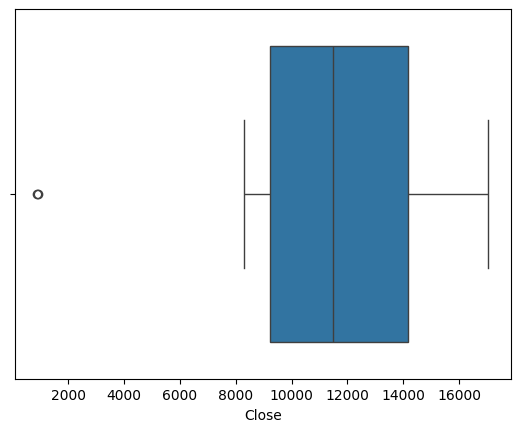

In [ ]:
sns.boxplot(x=data_ts['Close'])

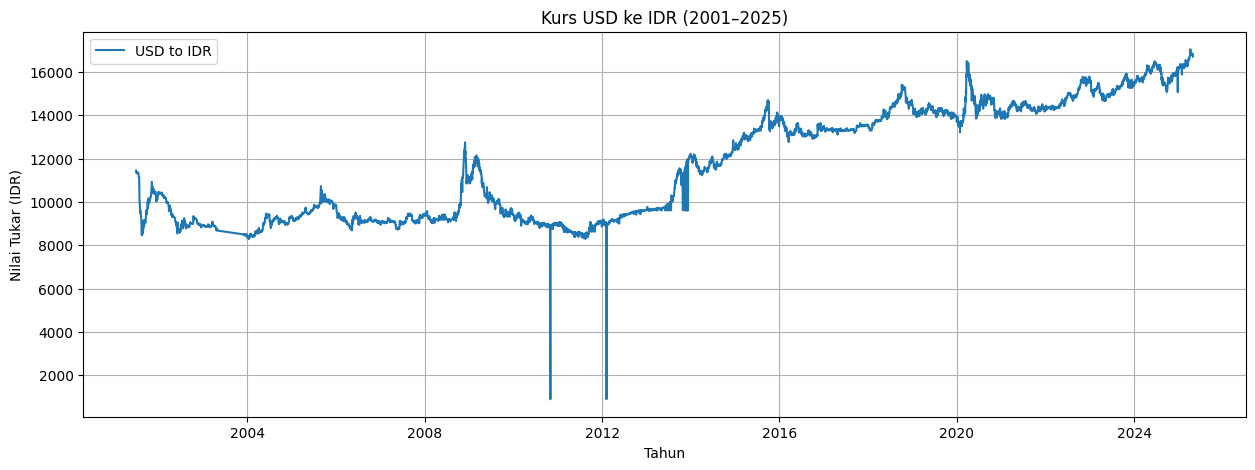

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(data_ts.index, data_ts['Close'], label='USD to IDR')
plt.title('Kurs USD ke IDR (2001–2025)')
plt.xlabel('Tahun')
plt.ylabel('Nilai Tukar (IDR)')
plt.legend()
plt.grid(True)
plt.show()

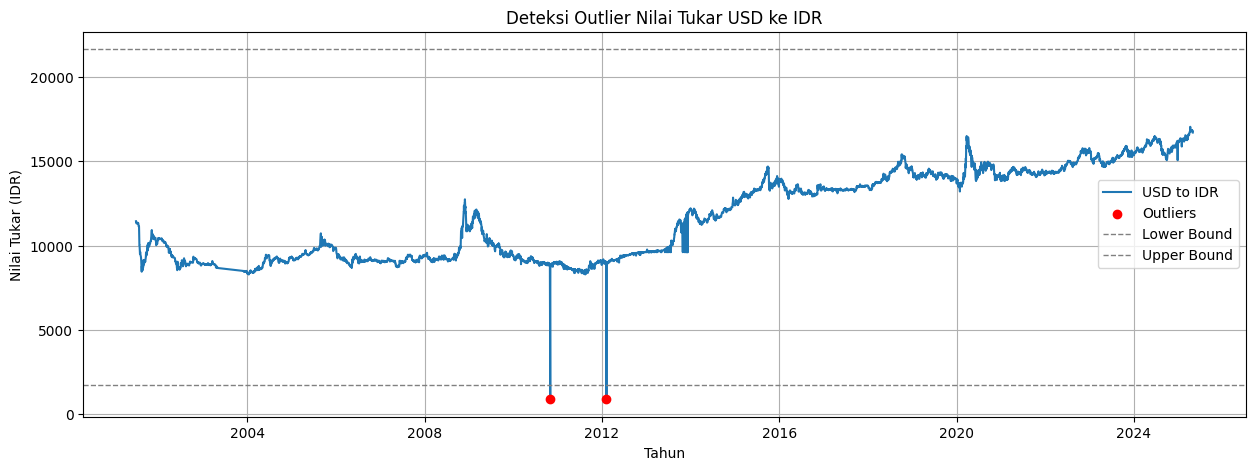

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Salin data agar aman
data_outlier = data_ts.copy()

# Hitung Q1 dan Q3
Q1 = data_outlier['Close'].quantile(0.25)
Q3 = data_outlier['Close'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tandai outlier
data_outlier['Outlier'] = ((data_outlier['Close'] < lower_bound) | (data_outlier['Close'] > upper_bound))

# Plot
plt.figure(figsize=(15, 5))
plt.plot(data_outlier.index, data_outlier['Close'], label='USD to IDR')
plt.scatter(data_outlier.index[data_outlier['Outlier']],
            data_outlier['Close'][data_outlier['Outlier']],
            color='red', label='Outliers', zorder=5)
plt.axhline(lower_bound, color='gray', linestyle='--', linewidth=1, label='Lower Bound')
plt.axhline(upper_bound, color='gray', linestyle='--', linewidth=1, label='Upper Bound')
plt.title('Deteksi Outlier Nilai Tukar USD ke IDR')
plt.xlabel('Tahun')
plt.ylabel('Nilai Tukar (IDR)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Hapus data outlier dari data_ts
data_ts_cleaned = data_outlier[~data_outlier['Outlier']].copy()

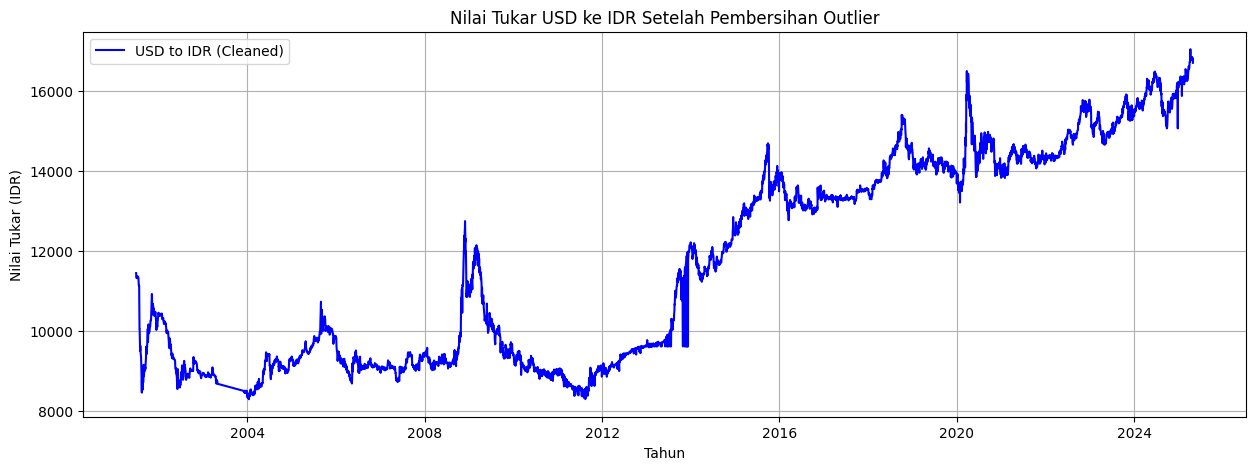

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data_ts_cleaned.index, data_ts_cleaned['Close'], label='USD to IDR (Cleaned)', color='blue')
plt.title('Nilai Tukar USD ke IDR Setelah Pembersihan Outlier')
plt.xlabel('Tahun')
plt.ylabel('Nilai Tukar (IDR)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_ts_cleaned.describe()

,Close
count,6002.000000
mean,11755.627317
std,2553.518902
min,8289.599609
25%,9210.250244
50%,11491.000000
75%,14188.000000
max,17051.900391


# **Uji Stasioneritas dan Differencing**

Dalam analisis time series, kita sering bekerja dengan data yang memiliki pola musiman atau tren. Stasioneritas merujuk pada kondisi di mana statistik dari data seperti mean (rata-rata), variance (varians), dan autokorelasi tidak berubah seiring waktu. Artinya, distribusi data tetap konsisten di sepanjang waktu.

Ada dua jenis stasioneritas:

* Stasioneritas yang lemah: Ini berarti data memiliki mean dan variance yang konstan dan autokorelasi yang hanya tergantung pada jarak antar titik data, bukan waktu.
* Stasioneritas yang kuat: Di sini, data benar-benar tidak bergantung pada waktu.

Pada time series forecasting, kita sering membutuhkan data yang stasioner karena sebagian besar model (terutama model ARIMA) bekerja lebih baik pada data yang tidak memiliki tren jangka panjang atau fluktuasi musiman yang signifikan.Untuk itu, Uji Stasioneritas - ADF Test (Augmented Dickey-Fuller) merupakan salah satu cara untuk menguji apakah data stasioner adalah dengan menggunakan ADF Test (Augmented Dickey-Fuller Test). Ini adalah uji statistik yang menguji hipotesis:

* Hipotesis nol (null hypothesis): Data tidak stasioner, atau ada unit root dalam data (artinya ada tren atau pola musiman yang mempengaruhi).
* Hipotesis alternatif: Data stasioner.

Proses uji ADF:
* p-value yang lebih kecil dari 0.05 mengindikasikan bahwa kita menolak hipotesis nol (data stasioner).
* Jika p-value lebih besar dari 0.05, maka kita gagal menolak hipotesis nol (data tidak stasioner).

Jika data tidak stasioner, salah satu teknik yang sering digunakan untuk mengubah data menjadi stasioner adalah ***differencing***. ***Differencing*** adalah proses menghitung selisih antara nilai saat ini dan nilai sebelumnya dalam urutan waktu.

Differencing membantu menghilangkan tren dan musiman dalam data. Ada beberapa jenis differencing:

**Differencing sederhana**: Menghitung perbedaan antara nilai saat ini dan nilai sebelumnya.

𝑌
𝑡
′
=
𝑌
𝑡
−
𝑌
𝑡
−
1
Y
t
′
​
 =Y
t
​
 −Y
t−1
​

**Seasonal differencing**: Jika data memiliki pola musiman, kita bisa mengambil perbedaan antara nilai saat ini dan nilai pada periode musiman sebelumnya.

𝑌
𝑡
′
=
𝑌
𝑡
−
𝑌
𝑡
−
𝑠
Y
t
′
​
 =Y
t
​
 −Y
t−s
​

di mana
𝑠
s adalah panjang musim atau siklus musiman (misalnya, setiap 12 bulan).

Setelah melakukan differencing, kita bisa memeriksa kembali apakah data telah menjadi stasioner menggunakan ADF Test lagi. Jika sudah stasioner, kita bisa melanjutkan ke tahap pemodelan.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_ts_cleaned['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

ADF Statistic: -0.49463831670140196
p-value: 0.8930585531106529
Critical Value 1%: -3.431445280853765
Critical Value 5%: -2.862024013055219
Critical Value 10%: -2.5670276377503667


* ADF Statistic = -0.49
* p-value = 0.893

Karena p-value jauh di atas 0.05, dan ADF Statistic lebih besar dari nilai kritis 10%, maka:

**Kesimpulan**: Data belum stasioner.

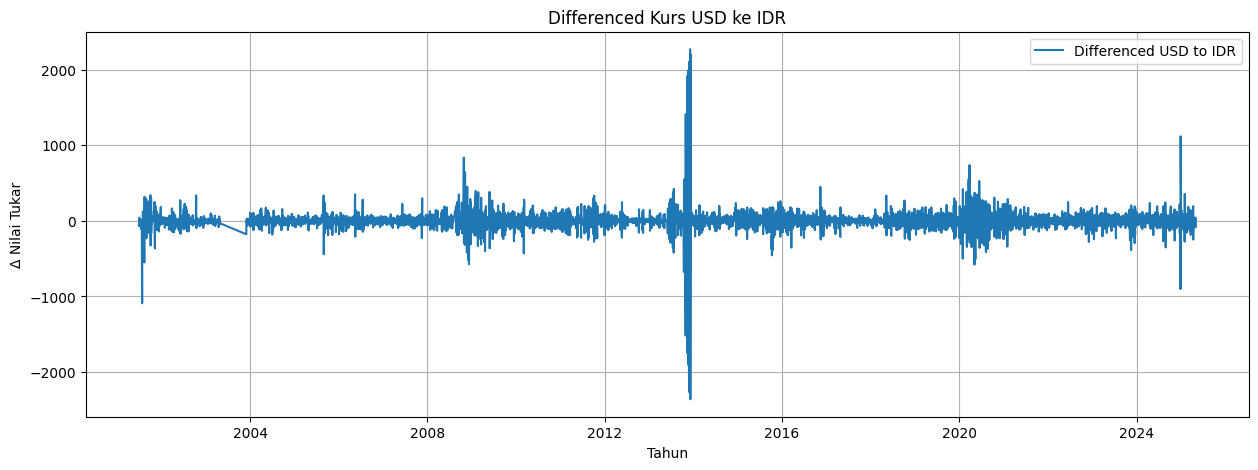

In [ ]:
# First-order differencing
data_diff = data_ts_cleaned.diff().dropna()

# Visualisasi hasil differencing
plt.figure(figsize=(15, 5))
plt.plot(data_diff.index, data_diff['Close'], label='Differenced USD to IDR')
plt.title('Differenced Kurs USD ke IDR')
plt.xlabel('Tahun')
plt.ylabel('Δ Nilai Tukar')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Melakukan ADF test lagi pada data yang sudah di-differencing
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(data_diff['Close'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
for key, value in result_diff[4].items():
    print(f'Critical Value {key}: {value}')

ADF Statistic: -15.539597580125468
p-value: 2.1678864670054753e-28
Critical Value 1%: -3.431445280853765
Critical Value 5%: -2.862024013055219
Critical Value 10%: -2.5670276377503667


**Sebelum Differencing**
* ADF Statistic: -0.49
* p-value: 0.893 (> 0.05)

Kesimpulan:
Nilai ADF statistic lebih besar dari critical values → gagal tolak H₀
p-value > 0.05 → data tidak stasioner

**Setelah Differencing (First-Order)**
* ADF Statistic: -25.53
* p-value: 2.17 × 10⁻²⁸ (< 0.05)

Kesimpulan:
Nilai ADF statistic lebih kecil dari critical values → tolak H₀
p-value < 0.05 → sudah menjadi data stasioner

# **Modelling**

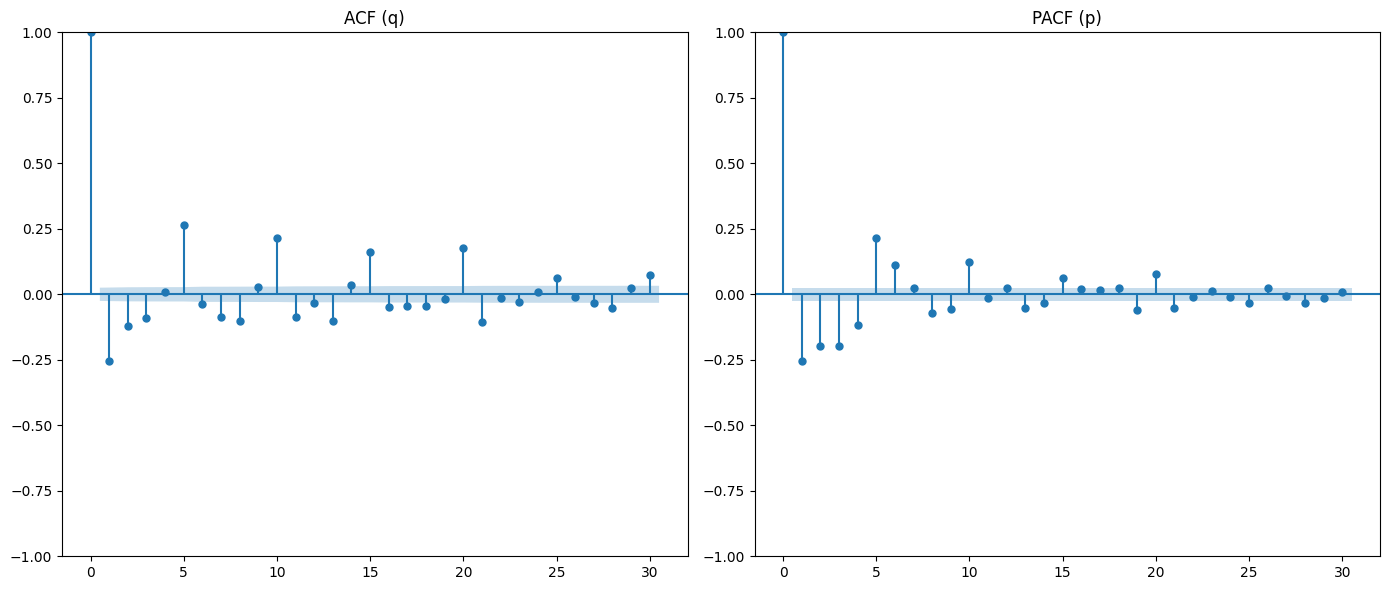

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Menampilkan grafik ACF dan PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(data_diff['Close'], ax=plt.gca(), lags=30)
plt.title('ACF (q)')

plt.subplot(1, 2, 2)
plot_pacf(data_diff['Close'], ax=plt.gca(), lags=30, method='ywm')
plt.title('PACF (p)')

plt.tight_layout()
plt.show()


**Interpretasi Grafik ACF & PACF**

ACF (untuk menentukan nilai q)
* Grafik ACF (Autocorrelation Function) menunjukkan cut-off (pemutusan tajam) atau peluruhan lambat.
* ACF terlihat signifikan hanya pada lag 1, lalu amplitudo nilai-nilainya mengecil.
* Ini mengindikasikan q = 1 untuk bagian MA (Moving Average).

PACF (untuk menentukan nilai p)
* Grafik PACF (Partial Autocorrelation Function) menunjukkan pemutusan tajam setelah lag 1.
* Nilai PACF signifikan hanya pada lag 1, lalu mengecil pada lag berikutnya.
* Ini menunjukkan p = 1 untuk bagian AR (Autoregressive).

**Kesimpulan Awal**
* p = 1   (dari PACF)
* d = 1   (karena sudah dilakukan differencing satu kali)
* q = 1   (dari ACF)

## **Model 1 menggunakan ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model1_arima = ARIMA(data_ts_cleaned['Close'], order=(1,1,1))
model1_fit = model1_arima.fit()

print(model1_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6002
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -37192.722
Date:                Sat, 03 May 2025   AIC                          74391.445
Time:                        06:16:13   BIC                          74411.544
Sample:                             0   HQIC                         74398.425
                               - 6002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2084      0.008     26.401      0.000       0.193       0.224
ma.L1         -0.5631      0.008    -70.011      0.000      -0.579      -0.547
sigma2      1.415e+04     53.314    265.464      0.0

**Interpretasi Hasil Model**

**Model summary**:

* ARIMA(1,1,1) berarti:
  * Orde 1 untuk autoregressive (AR)
  * Diferensiasi 1 (I) → untuk membuat data menjadi stasioner
  * Moving average (MA) orde 1

* AIC: 74391.445 — digunakan untuk membandingkan antar model, semakin kecil semakin baik.

* Koefisien:
  * ar.L1 = 0.2084 → pengaruh positif dari lag sebelumnya.
  * ma.L1 = -0.5631 → efek negatif dari error lag sebelumnya.

* sigma2 = 1.415e+04 → variansi dari noise model.

* Ljung-Box test (L1): Probabilitas 0.26 → tidak ada autocorrelation signifikan pada lag 1.

* JB test menunjukkan non-normalitas residual, dengan kurtosis sangat tinggi (104.15).

**Kesimpulan**: Model cukup baik menangani serial correlation, tapi residualnya heavy-tailed dan sangat non-normal.

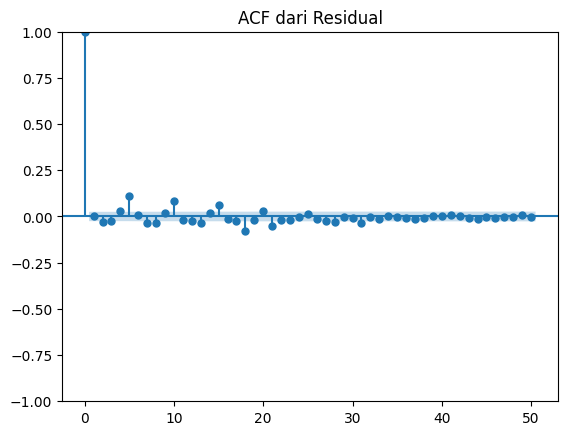

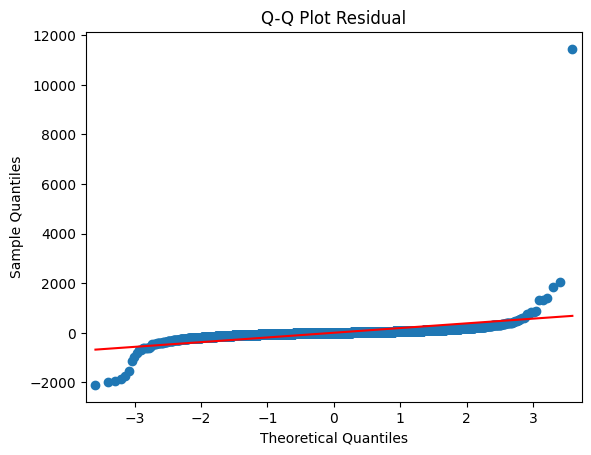

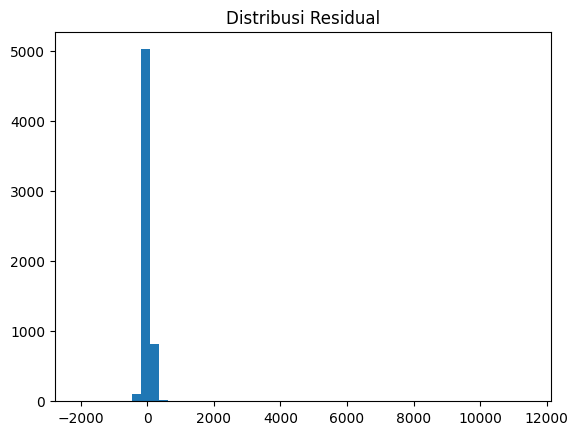

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot residual
residuals = model1_fit.resid

# ACF plot residual
sm.graphics.tsa.plot_acf(residuals, lags=50)
plt.title("ACF dari Residual")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot Residual")
plt.show()

# Histogram
plt.hist(residuals, bins=50)
plt.title("Distribusi Residual")
plt.show()

## **Model 2 menggunakan SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Misal seasonality 12 bulan (s=12) dengan 1 lag musiman
model_sarima = SARIMAX(
    data_ts_cleaned['Close'],
    order=(3, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
res_sarima = model_sarima.fit()
print(res_sarima.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 6002
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -36945.591
Date:                            Sat, 03 May 2025   AIC                          73905.181
Time:                                    06:17:09   BIC                          73952.048
Sample:                                         0   HQIC                         73921.460
                                           - 6002                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1799      0.011    -15.882      0.000      -0.202      -0.158
ar.L2         -0.2139      0.003   

**Model summary**:

* Penambahan komponen musiman (seasonal) sangat penting di model ini.

* seasonal_order=(1,1,1,12) artinya ada efek musiman

* tahunan (12 periode = bulanan).

* AIC: 73905.181 → lebih rendah dari ARIMA → model ini lebih baik dari ARIMA.

* Koefisien signifikan semua, kecuali ar.S.L12 yang marginal (p ≈ 0.08).

* ma.S.L12 = -1.000 → model menangkap efek musiman dengan kuat.

* JB test dan Heteroskedastisitas test menunjukkan masih ada masalah pada residual.

**Kesimpulan**: Model ini menangkap pola musiman dengan baik, dan secara statistik lebih baik daripada ARIMA biasa (lihat AIC dan log-likelihood).

## **Model 3 menggunakan ARIMA-GARCH**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.9 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

from arch import arch_model

# Pertama ambil residual ARIMA terbaik
residuals = model1_fit.resid #diambil dari model 1 ARIMAA

# Fit GARCH ke residual dari ARIMA
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Summary hasil GARCH
print(garch_result.summary())


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.597e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -34339.2
Distribution:                  Normal   AIC:                           68686.5
Method:            Maximum Likelihood   BIC:                           68713.3
                                        No. Observations:                 6002
Date:                Sat, May 03 2025   Df Residuals:                     6001
Time:                        06:19:02   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3756      0.889      0.423      0.673 [ -1.366,  2.11

**Model summary**:

* Digunakan untuk memodelkan volatilitas, cocok untuk data keuangan.

* Mean model: konstan (mu = 0.3756), tidak signifikan (p=0.673) → tidak banyak tren di mean.

* Variansi model (GARCH):

  * omega = 211.65 → base level volatilitas.

  * alpha[1] = 0.1703 → efek shock jangka pendek.

  * beta[1] = 0.8183 → efek persistensi volatilitas (tinggi → efek volatilitas bertahan lama).

* AIC: 68686.5 → jauh lebih rendah dari ARIMA/SARIMA → secara log-likelihood lebih fit.

**Kesimpulan**: Model sangat cocok untuk memprediksi volatilitas USD/IDR. Kombinasi GARCH dan ARIMA berguna untuk data keuangan yang heteroskedastik.

## **Model 4 Deep Learning LSTM**

Epoch 1/50
150/150 [==============================] - 14s 56ms/step - loss: 0.0087 - val_loss: 2.8073e-04
Epoch 2/50
150/150 [==============================] - 5s 36ms/step - loss: 4.5133e-04 - val_loss: 2.5420e-04
Epoch 3/50
150/150 [==============================] - 3s 23ms/step - loss: 4.1554e-04 - val_loss: 4.6060e-04
Epoch 4/50
150/150 [==============================] - 3s 22ms/step - loss: 4.1971e-04 - val_loss: 2.8069e-04
Epoch 5/50
150/150 [==============================] - 2s 16ms/step - loss: 3.7719e-04 - val_loss: 2.6317e-04
Epoch 6/50
150/150 [==============================] - 2s 16ms/step - loss: 3.4183e-04 - val_loss: 2.3922e-04
Epoch 7/50
150/150 [==============================] - 2s 16ms/step - loss: 3.3112e-04 - val_loss: 1.6570e-04
Epoch 8/50
150/150 [==============================] - 3s 20ms/step - loss: 3.2578e-04 - val_loss: 1.8709e-04
Epoch 9/50
150/150 [==============================] - 3s 20ms/step - loss: 3.1135e-04 - val_loss: 1.6858e-04
Epoch 10/50
150/150 [=

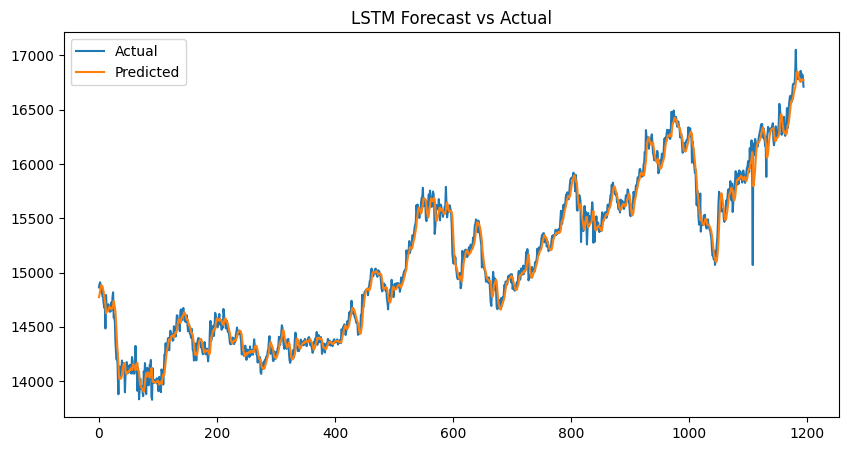

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load dataset
# Gunakan data yang sudah dibersihkan
df = data_ts_cleaned[['Close']].copy()

# Normalisasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Membuat sequence
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('LSTM Forecast vs Actual')
plt.show()


**Interpretasi**
* Garis biru (Actual) dan garis oranye (Predicted) hampir selalu berdekatan. Ini menunjukkan bahwa model LSTM berhasil menangkap pola tren dan fluktuasi dalam data historis nilai tukar USD/IDR.

* Fluktuasi musiman dan jangka pendek juga cukup akurat direplikasi oleh model.

* Tidak ada deviasi besar antara prediksi dan nilai aktual, artinya kesalahan prediksi relatif kecil.

* Tidak terlihat adanya overfitting atau underfitting yang ekstrem — prediksi mengikuti data aktual dengan halus tanpa noise yang berlebihan.

## **Evaluasi Model**

Evaluasi model dalam proyek machine learning/time series forecasting memiliki beberapa tujuan penting:

* **Mengukur Kinerja Model**
  * Mengetahui seberapa akurat model dalam memprediksi data yang belum pernah dilihat (data uji).
  * Contoh metrik: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), MAPE (Mean Absolute Percentage Error).

* **Membandingkan Beberapa Model**
  * Menentukan model terbaik dari beberapa alternatif

* **Menentukan Kelayakan Model untuk Deployment**
  * Jika error terlalu besar (misal MAPE > 10%), model mungkin tidak layak digunakan.

* **Memberikan Insight**

In [ ]:
# Evaluasi dengan Metrik Error
# (Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan Mean Absolute Percentage Error (MAPE).)

from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Membuat Dataset Uji (Test Set) yang lebih konsisten
split_index = int(0.8 * len(data_ts_cleaned))
test_actual = data_ts_cleaned['Close'].iloc[split_index:].values

In [ ]:
# Evaluasi model 1 ARIMA

forecast_arima = model1_fit.forecast(steps=len(test_actual))

mae_arima = mean_absolute_error(test_actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test_actual, forecast_arima))
mape_arima = mean_absolute_percentage_error(test_actual, forecast_arima)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Evaluasi model 2 SARIMA

forecast_sarima = res_sarima.forecast(steps=len(test_actual))

mae_sarima = mean_absolute_error(test_actual, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test_actual, forecast_sarima))
mape_sarima = mean_absolute_percentage_error(test_actual, forecast_sarima)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Evaluasi model 3 ARIMA-GARCH

# Gunakan prediksi ARIMA, GARCH menambah value jika ingin modeling volatilitas
forecast_arima_garch = model1_fit.forecast(steps=len(test_actual))

mae_garch = mean_absolute_error(test_actual, forecast_arima_garch)
rmse_garch = np.sqrt(mean_squared_error(test_actual, forecast_arima_garch))
mape_garch = mean_absolute_percentage_error(test_actual, forecast_arima_garch)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Evaluasi model 4 LSTM

mae_lstm = mean_absolute_error(y_test_true, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_test_true, y_pred))
mape_lstm = mean_absolute_percentage_error(y_test_true, y_pred)

In [ ]:
# Hasil Evaluasi

result_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'ARIMA-GARCH', 'LSTM'],
    'MAE': [mae_arima, mae_sarima, mae_garch, mae_lstm],
    'RMSE': [rmse_arima, rmse_sarima, rmse_garch, rmse_lstm],
    'MAPE': [mape_arima, mape_sarima, mape_garch, mape_lstm]
})

print(result_df.sort_values(by='RMSE'))

         Model          MAE         RMSE       MAPE
3         LSTM    65.486293    92.236954   0.432285
0        ARIMA  1644.529932  1798.863891  11.139310
2  ARIMA-GARCH  1644.529932  1798.863891  11.139310
1       SARIMA  2212.802759  2260.489106  14.816056


**Interpretasi Evaluasi Model**

* LSTM: Kesalahan rata-rata hanya Rp65, fluktuasi ±Rp92, dan rata-rata persentase error 0.43 %—sangat rendah.
* ARIMA: Error ratusan hingga ribuan rupiah; MAPE 11 %.
* ARIMA-GARCH: Sama persis dengan ARIMA—GARCH tidak menambah akurasi forecast harga.
* SARIMA: Performanya paling buruk, error terbesar dan MAPE ~15 %.

**Kesimpulan**
* **Model terbaik**: LSTM, karena memberikan MAE, RMSE, dan MAPE paling rendah jauh di bawah model statistik klasik.
* ARIMA vs ARIMA-GARCH: identik, karena GARCH hanya menangani volatilitas (variance), bukan perbaikan langsung level prediksi harga.
* SARIMA kurang cocok — mungkin seasonal (tahunan) tidak terlalu kuat pada data harian nilai tukar ini.

# **Forecasting (Peramalan)**

Setelah menemukan model terbaik melalui evaluasi yang sudah dilakukan. Hal berikutnya adalah menguji akurasi atau performa model tersebut dengan Forecasting (Peramalan) untuk melihat prediksi yang dilakukan model dalam melihat situasi kedepannya.

In [ ]:
# Prediksi dengan model LSTM pada data uji
y_pred_scaled = model.predict(X_test)  # X_test adalah input data uji
y_pred = scaler.inverse_transform(y_pred_scaled)  # Mengembalikan skala ke nilai asli
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))  # Nilai sebenarnya dari data uji

# Evaluasi model LSTM
mae_lstm = mean_absolute_error(y_test_true, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_test_true, y_pred))
mape_lstm = mean_absolute_percentage_error(y_test_true, y_pred)

print(f"MAE: {mae_lstm}")
print(f"RMSE: {rmse_lstm}")
print(f"MAPE: {mape_lstm}")

38/38 [==============================] - 0s 7ms/step
MAE: 65.48629298509414
RMSE: 92.23695388934317
MAPE: 0.4322846208664709


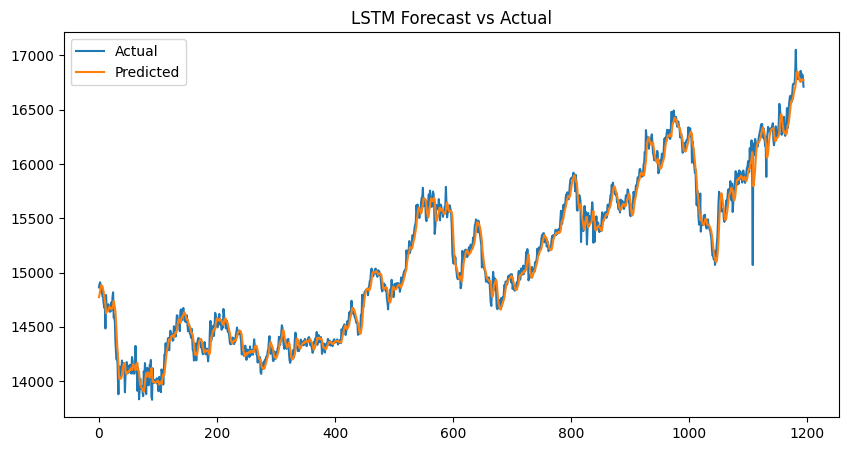

In [ ]:
# Plot hasil peramalan dan data asli
plt.figure(figsize=(10, 5))
plt.plot(y_test_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('LSTM Forecast vs Actual')
plt.show()

1/1 [==============================] - 0s 30ms/step


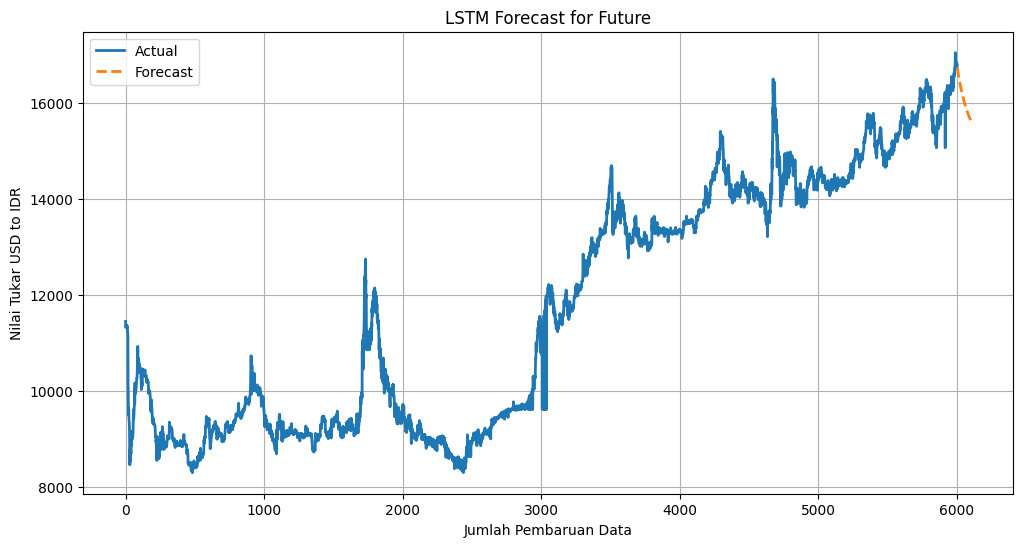

In [ ]:
# Ambil data terakhir untuk memulai prediksi ke depan
last_sequence = scaled_data[-seq_length:]  # Sequence terakhir
last_sequence = last_sequence.reshape((1, seq_length, 1))  # Bentuk sesuai input LSTM

# Prediksi untuk 30 hari ke depan
forecast_steps = 100
forecast = []

for _ in range(forecast_steps):
    predicted_value = model.predict(last_sequence)
    forecast.append(predicted_value)

    # Update last_sequence untuk prediksi selanjutnya
    last_sequence = np.append(last_sequence[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Inverse transform hasil forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot forecast untuk periode ke depan
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(scaled_data)), scaler.inverse_transform(scaled_data), label='Actual', linewidth=2)
plt.plot(np.arange(len(scaled_data), len(scaled_data) + forecast_steps), forecast, label='Forecast', linestyle='--', linewidth=2)
plt.title('LSTM Forecast for Future')
plt.xlabel('Jumlah Pembaruan Data')
plt.ylabel('Nilai Tukar USD to IDR')
plt.legend()
plt.grid(True)
plt.show()


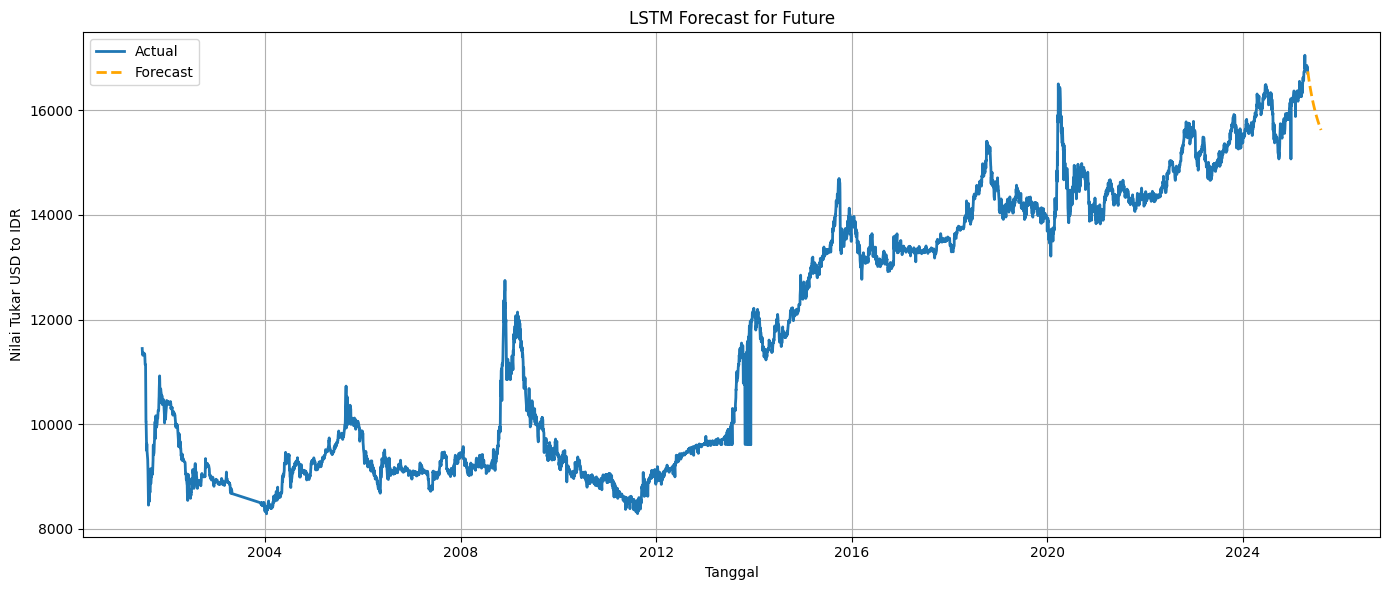

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ambil tanggal terakhir dari data asli
last_date = data_ts_cleaned.index[-1]

# 2. Buat range tanggal untuk hasil forecast
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# 3. Plot hasil forecast bersama data aktual
plt.figure(figsize=(14,6))
plt.plot(data_ts_cleaned.index, data_ts_cleaned['Close'], label='Actual', linewidth=2)
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--', linewidth=2, color='orange')

# 4. Perbaikan visualisasi
plt.title('LSTM Forecast for Future')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Tukar USD to IDR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# 1. Tentukan tanggal awal (hari setelah data terakhir)
last_date = data_ts_cleaned.index[-1]

# 2. Buat rangkaian tanggal harian sebanyak 30 hari ke depan
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=30,
                             freq='D')

# 3. Bentuk Series atau DataFrame
forecast_series = pd.Series(forecast.flatten(), index=future_dates, name='Predicted_Close')

forecast_df = forecast_series.reset_index().rename(columns={'index': 'Date'})
print(forecast_df)


         Date  Predicted_Close
0  2025-05-01     16743.564453
1  2025-05-02     16724.896484
2  2025-05-03     16705.558594
3  2025-05-04     16686.087891
4  2025-05-05     16666.730469
5  2025-05-06     16647.640625
6  2025-05-07     16628.902344
7  2025-05-08     16610.562500
8  2025-05-09     16592.632812
9  2025-05-10     16575.121094
10 2025-05-11     16558.001953
11 2025-05-12     16541.242188
12 2025-05-13     16524.794922
13 2025-05-14     16508.636719
14 2025-05-15     16492.736328
15 2025-05-16     16477.070312
16 2025-05-17     16461.611328
17 2025-05-18     16446.326172
18 2025-05-19     16431.246094
19 2025-05-20     16416.353516
20 2025-05-21     16401.648438
21 2025-05-22     16387.119141
22 2025-05-23     16372.757812
23 2025-05-24     16358.558594
24 2025-05-25     16344.517578
25 2025-05-26     16330.627930
26 2025-05-27     16316.890625
27 2025-05-28     16303.311523
28 2025-05-29     16289.884766
29 2025-05-30     16276.609375


# **Menyimpan Model dan Menguji Forecasting secara Dinamis**

In [ ]:
# Simpan Model
model.save('lstm_model_forecasting.h5')
print("Model berhasil disimpan.")

Model berhasil disimpan.


In [ ]:
# Menyimpan scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler berhasil disimpan.")

Scaler berhasil disimpan.


Enter the number of days to forecast: 20
1/1 [==============================] - 0s 23ms/step


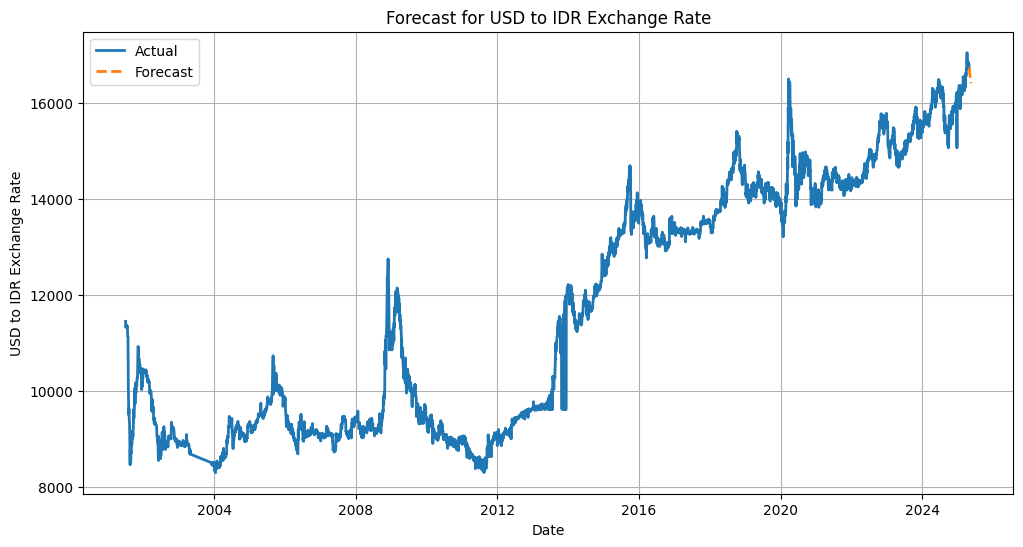

Forecast for the next 20 days:
            Predicted USD to IDR
2025-05-01          16743.564453
2025-05-02          16724.896484
2025-05-03          16705.558594
2025-05-04          16686.087891
2025-05-05          16666.730469
2025-05-06          16647.640625
2025-05-07          16628.902344
2025-05-08          16610.562500
2025-05-09          16592.632812
2025-05-10          16575.121094
2025-05-11          16558.001953
2025-05-12          16541.242188
2025-05-13          16524.794922
2025-05-14          16508.636719
2025-05-15          16492.736328
2025-05-16          16477.070312
2025-05-17          16461.611328
2025-05-18          16446.326172
2025-05-19          16431.246094
2025-05-20          16416.353516


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model

# Memuat model dan scaler yang sudah disimpan
model = load_model('lstm_model_forecasting.h5')
scaler = joblib.load('scaler.pkl')

# Fungsi untuk melakukan prediksi berdasarkan jumlah hari yang diinput oleh user
def forecast_for_days(days_ahead):
    # Ambil sequence terakhir dari data yang sudah dinormalisasi
    last_sequence = scaled_data[-seq_length:]  # Sequence terakhir
    last_sequence = last_sequence.reshape((1, seq_length, 1))  # Bentuk sesuai input LSTM

    forecast = []
    for _ in range(days_ahead):
        predicted_value = model.predict(last_sequence)
        forecast.append(predicted_value)

        # Update sequence untuk prediksi berikutnya
        last_sequence = np.append(last_sequence[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

    # Inverse transform hasil forecast
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

    # Tanggal untuk prediksi berdasarkan hari ini
    last_date = data_ts_cleaned.index[-1]  # Tanggal terakhir dari data
    forecast_dates = pd.date_range(last_date, periods=days_ahead + 1, freq='D')[1:]

    # Menampilkan hasil forecast dan tanggal
    forecast_result = pd.DataFrame(forecast, index=forecast_dates, columns=['Predicted USD to IDR'])

    # Visualisasi hasil forecast
    plt.figure(figsize=(12, 6))
    plt.plot(data_ts_cleaned.index, scaler.inverse_transform(scaled_data), label='Actual', linewidth=2)
    plt.plot(forecast_result.index, forecast_result['Predicted USD to IDR'], label='Forecast', linestyle='--', linewidth=2)
    plt.title('Forecast for USD to IDR Exchange Rate')
    plt.xlabel('Date')
    plt.ylabel('USD to IDR Exchange Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Menampilkan hasil forecast untuk output
    print(f"Forecast for the next {days_ahead} days:")
    print(forecast_result)

# Meminta input dari user untuk jumlah hari yang ingin diprediksi
days_to_predict = int(input("Enter the number of days to forecast: "))
forecast_for_days(days_to_predict)
